In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [2]:
global mu,gamma,D,eta,kappa,NumSpecies

In [3]:
def TwoSpeciesHGT(t,y):
    dydt=np.zeros(2*NumSpecies)
    for i in range(NumSpecies):
        dydt[i]=mu[i]*y[i+NumSpecies]*(1-gamma*(sum(y[np.arange(0,NumSpecies,1)])-y[i])-y[i])-D*y[i]
        if i==0:
            dydt[i+NumSpecies]=dydt[i]
        else:
            dydt[i+NumSpecies]=mu[i]*y[i+NumSpecies]*(1-gamma*(sum((y[np.arange(0,NumSpecies,1)]))-y[i])-y[i])+eta*(y[i]-y[i+NumSpecies])*sum(y[np.arange(NumSpecies,2*NumSpecies,1)])-kappa*y[NumSpecies+i]-D*y[i+NumSpecies]
    return dydt

In [4]:
def GetPositive(input):
    temp=[]
    for i in input:
        if i>10**(-8):
            temp.append(i)
    return temp

In [5]:
NumSpecies=2
gammas=[0.8,0.9,0.99]
D=0.2
etas=np.arange(0,0.6,0.1)
kappa=0.05
timespan=np.arange(0,201,1)

mu=0.5*np.ones(NumSpecies)

initial=np.zeros(2*NumSpecies)
initial[range(NumSpecies)]=1/NumSpecies
initial[NumSpecies]=initial[0]
diver=np.zeros((len(gammas),len(etas)))
for k in range(len(gammas)):
    gamma=gammas[k]
    for j in range(len(etas)):
        eta=etas[j]
        sol=solve_ivp(TwoSpeciesHGT,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
        y=np.transpose(sol.y)
        temp=y[-1,range(NumSpecies)]
        temp=GetPositive(temp)
        temp=temp/sum(temp)
        diver[k,j]=np.exp(sum(np.multiply(-temp,np.log(temp))))


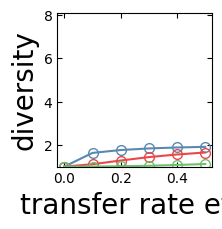

In [6]:
plt.figure(figsize=(2,2))
for i in range(len(gammas)):
    if i==0:
        plt.plot(etas,diver[i,:],'o-',markersize=7,fillstyle='none',color=(0.3467,0.5360,0.6907))
    if i==1:
        plt.plot(etas,diver[i,:],'o-',markersize=7,fillstyle='none',color=(0.9153,0.2816,0.2878))
    if i==2:
        plt.plot(etas,diver[i,:],'o-',markersize=7,fillstyle='none',color=(0.4416,0.7490,0.4322))
plt.xlabel('transfer rate eta',fontsize=20)
plt.ylabel('diversity',fontsize=20)
plt.ylim(1,8.1)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('Species2.pdf')
plt.show()

In [7]:
import pandas as pd
df=pd.DataFrame(diver)
df.to_csv("Species2.csv")